<p><center style="font-family:cursive; color:orange; font-size:120%;">In the name of God</center></p>

## <p> <center style="font-family:newtimeroman;font-size:180%;">💊AI-Based Prediction for Drug Recommendation Using GCN-AE💊 </center> </p>


<p><center style="color:#159364; font-family:cursive;">Thanks for visiting my notebook </center></p>

***
<br>
<center><img src='https://miro.medium.com/max/1400/0*dXAsxs-cxTyu6WyT' height=300px width=750px></center><br>

### 🎯 Objectives of Notebook
**This notebook aims to:**
*   **Block 1: Dimensionality Reduction Using GCN-AE**
Implement a Graph Convolutional Network Autoencoder (GCN-AE) to learn meaningful embeddings from the data.

*   **Block 2: Drug Classification Using Ensemble Learning**
Perform drug classification by applying ensemble learning techniques.


In [1]:
# Mount Google Drive
from google.colab import drive

# Mounting Google Drive to access files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install torch torch-geometric # Install torch_geometric

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch and PyTorch Geometric imports
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_scipy_sparse_matrix
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Pandas display option
pd.set_option('display.max_columns', 100)


In [4]:
# File path for the dataset stored in Google Drive
url1 = '/content/drive/MyDrive/Drug recommendation based deep learning/Medical_Data.csv'
url2 = '/content/drive/MyDrive/Mimic_finale_2024.csv'

In [5]:
# Read the dataset from the CSV file and load it into a DataFrame
Medical_data_df = pd.read_csv(url1)
Mimic= pd.read_csv(url2)

In [6]:
Medical_data_df .head()

,SUBJECT_ID,GENDER,AGE PATIENT,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,EXPIRE_FLAG,CD9_CODE_PROCEDURES,LOS,SPEC_ITEMID,ORG_ITEMID,ISOLATE_NUM,AB_ITEMID,DILUTION_VALUE,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_URGENT,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,ADMISSION_LOCATION_TRANSFER FROM OTHER HEALT,ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR,ADMISSION_LOCATION_TRSF WITHIN THIS FACILITY,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,RELIGION_7TH DAY ADVENTIST,RELIGION_BAPTIST,RELIGION_BUDDHIST,RELIGION_CATHOLIC,RELIGION_CHRISTIAN SCIENTIST,RELIGION_EPISCOPALIAN,RELIGION_GREEK ORTHODOX,RELIGION_HEBREW,RELIGION_HINDU,RELIGION_JEHOVAH'S WITNESS,RELIGION_JEWISH,RELIGION_MUSLIM,RELIGION_NOT SPECIFIED,RELIGION_OTHER,RELIGION_PROTESTANT QUAKER,RELIGION_ROMANIAN EAST. ORTH,RELIGION_UNITARIAN-UNIVERSALIST,RELIGION_UNOBTAINABLE,ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE,ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,...,ORG_NAME_STREPTOCOCCUS ANGINOSUS,ORG_NAME_STREPTOCOCCUS ANGINOSUS (MILLERI) GROUP,ORG_NAME_STREPTOCOCCUS BOVIS,ORG_NAME_STREPTOCOCCUS MILLERI GROUP,ORG_NAME_STREPTOCOCCUS MITIS,ORG_NAME_STREPTOCOCCUS PNEUMONIAE,ORG_NAME_STREPTOCOCCUS SPECIES,ORG_NAME_STREPTOCOCCUS VESTIBULARIS,ORG_NAME_VEILLONELLA SPECIES,ORG_NAME_VIBRIO SPECIES,ORG_NAME_VIRIDANS STREPTOCOCCI,ORG_NAME_VIRUS,ORG_NAME_YEAST,"ORG_NAME_YEAST, PRESUMPTIVELY NOT C. ALBICANS",INTERPRETATION_I,INTERPRETATION_P,INTERPRETATION_R,INTERPRETATION_S,AB_NAME_AMIKACIN,AB_NAME_AMPICILLIN,AB_NAME_AMPICILLIN/SULBACTAM,AB_NAME_CEFAZOLIN,AB_NAME_CEFEPIME,AB_NAME_CEFTAZIDIME,AB_NAME_CEFTRIAXONE,AB_NAME_CEFUROXIME,AB_NAME_CHLORAMPHENICOL,AB_NAME_CIPROFLOXACIN,AB_NAME_CLINDAMYCIN,AB_NAME_DAPTOMYCIN,AB_NAME_ERYTHROMYCIN,AB_NAME_GENTAMICIN,AB_NAME_IMIPENEM,AB_NAME_LEVOFLOXACIN,AB_NAME_LINEZOLID,AB_NAME_MEROPENEM,AB_NAME_NITROFURANTOIN,AB_NAME_OXACILLIN,AB_NAME_PENICILLIN,AB_NAME_PENICILLIN G,AB_NAME_PIPERACILLIN,AB_NAME_PIPERACILLIN/TAZO,AB_NAME_RIFAMPIN,AB_NAME_TETRACYCLINE,AB_NAME_TOBRAMYCIN,AB_NAME_TRIMETHOPRIM/SULFA,AB_NAME_VANCOMYCIN,DRUG_TYPE_ADDITIVE,DRUG_TYPE_BASE,DRUG_TYPE_MAIN
0,0.820721,0.0,0.866667,0.0,1.0,0.0,0.790686,0.008587,0.846154,0.000000,0.000000,0.896552,0.003906,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.323156,0.0,0.480000,0.0,1.0,0.0,0.313671,0.012341,0.978022,0.243626,0.021479,0.473327,0.025769,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.237362,1.0,0.706667,0.0,1.0,0.0,0.388883,0.001602,0.109890,0.243626,0.021479,0.473327,0.025769,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.324316,0.0,0.253333,0.0,1.0,1.0,0.371657,0.037262,0.846154,0.243626,0.021479,0.473327,0.025769,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.

# **Data** **Representation**

In [7]:
pip install torchviz


In [8]:
pip install hiddenlayer


In [9]:
features_processed_demo_df1=Medical_data_df.copy()

In [10]:
features_processed_demo_df1.shape

(250, 13703)

In [11]:
# Convert DataFrame to NumPy array
features_matrix =features_processed_demo_df1.to_numpy()

In [12]:
 #Convertir la feature matrix en tensor
features_tensor= torch.tensor(features_matrix, dtype=torch.float32)
features_tensor

tensor([[0.8207, 0.0000, 0.8667,  ..., 0.0000, 0.0000, 1.0000],
        [0.3232, 0.0000, 0.4800,  ..., 0.0000, 0.0000, 1.0000],
        [0.2374, 1.0000, 0.7067,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.5612, 0.0000, 0.6267,  ..., 0.0000, 0.0000, 1.0000],
        [0.8863, 1.0000, 0.5067,  ..., 0.0000, 1.0000, 0.0000],
        [0.3039, 1.0000, 0.8933,  ..., 0.0000, 0.0000, 1.0000]])

In [13]:
# Convertir feature_matrix en tableau NumPy
feature_matrix_np = features_tensor.detach().numpy()

# Calculer la matrice de similarité cosinus
similarity_matrix_cosine = cosine_similarity(feature_matrix_np)

print(similarity_matrix_cosine)


[[0.9999999  0.3325238  0.46952724 ... 0.33363557 0.3294656  0.36602104]
 [0.3325238  0.9999999  0.37460124 ... 0.4503557  0.38818    0.3595133 ]
 [0.46952724 0.37460124 0.9999998  ... 0.41574985 0.4719632  0.5332335 ]
 ...
 [0.33363557 0.4503557  0.41574985 ... 1.         0.392345   0.44721597]
 [0.3294656  0.38818    0.4719632  ... 0.392345   0.99999976 0.41757214]
 [0.36602104 0.3595133  0.5332335  ... 0.44721597 0.41757214 1.        ]]


In [14]:
similarity_matrix_cosine.shape

(250, 250)

In [15]:
# Convertir la matrice de similarité cosinus en un tenseur PyTorch
similarity_tensor_cosine = torch.tensor(similarity_matrix_cosine, dtype=torch.float32)

In [16]:
similarity_tensor_cosine.shape

torch.Size([250, 250])

Pour entraîner un graphe convolutionnel (GCN) et prédire une matrice d'embeddings à partir d'une matrice de caractéristiques (feature Matrix) et d'une matrice de similarité (adjacency Matrix), il est essentiel de diviser les données en ensembles d' entraînement et de validation.

In [17]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_scipy_sparse_matrix
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

# Données d'entrée
features = features_tensor
adjacency = similarity_tensor_cosine

# Utilisation de torch_geometric pour gérer le graphe
edge_index, edge_weight = from_scipy_sparse_matrix(csr_matrix(adjacency))
data = Data(x=features, edge_index=edge_index, edge_attr=edge_weight)

# Division des données en ensembles d'entraînement et de validation
num_nodes = features.shape[0]
indices = np.arange(num_nodes)
train_indices, val_indices = train_test_split(indices, test_size=0.2, random_state=42)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[train_indices] = True
val_mask[val_indices] = True

data.train_mask = train_mask
data.val_mask = val_mask

# Définition du modèle GCN-AE avec 3 couches et dropout
class GCN_AE(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, embedding_dim, output_dim, dropout=0.5):
        super(GCN_AE, self).__init__()
        self.encoder1 = GCNConv(input_dim, hidden_dim1)
        self.encoder2 = GCNConv(hidden_dim1, hidden_dim2)
        self.encoder3 = GCNConv(hidden_dim2, embedding_dim)
        self.embedding = GCNConv(embedding_dim, embedding_dim)
        self.decoder1 = GCNConv(embedding_dim, hidden_dim2)
        self.decoder2 = GCNConv(hidden_dim2, hidden_dim1)
        self.reconstructed = GCNConv(hidden_dim1, output_dim)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
        # Encoder
        x = self.encoder1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.encoder2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.encoder3(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, self.dropout, training=self.training)
        embeddings = self.embedding(x, edge_index, edge_weight)
        # Decoder
        x = F.relu(embeddings)
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.decoder1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.decoder2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.reconstructed(x, edge_index, edge_weight)
        return x, embeddings

# Création du modèle
input_dim = features.shape[1]
hidden_dim1 = 64
hidden_dim2 = 32
embedding_dim = 16
output_dim = input_dim  # La dimension de sortie est égale à la dimension d'entrée pour la reconstruction
dropout = 0.5

model = GCN_AE(input_dim, hidden_dim1, hidden_dim2, embedding_dim, output_dim, dropout)

# Entraînement du modèle
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Scheduler pour réduire le taux d'apprentissage
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, min_lr=1e-5)

# Listes pour enregistrer les pertes
train_losses = []
val_losses = []

best_val_loss = float('inf')
patience_counter = 0
patience = 20  # Nombre d'époques pour l'arrêt précoce

def save_checkpoint(epoch, model, optimizer, scheduler, train_loss, val_loss, filepath):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'train_loss': train_loss,
        'val_loss': val_loss
    }
    torch.save(checkpoint, filepath)
    print(f'Checkpoint saved at epoch {epoch + 1}')

def train():
    model.train()
    optimizer.zero_grad()
    reconstructed, embeddings = model(data)
    loss = F.mse_loss(reconstructed[data.train_mask], features[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def validate():
    model.eval()
    with torch.no_grad():
        reconstructed, embeddings = model(data)
        loss = F.mse_loss(reconstructed[data.val_mask], features[data.val_mask])
    return loss.item()

checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

for epoch in range(200):  # Augmenter le nombre d'époques pour permettre une meilleure convergence
    train_loss = train()
    val_loss = validate()
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Epoch: {epoch + 1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Scheduler step
    scheduler.step(val_loss)

    # Save checkpoint every 10 epochs
    if (epoch + 1) % 10 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch + 1}.pth')
        save_checkpoint(epoch, model, optimizer, scheduler, train_loss, val_loss, checkpoint_path)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Enregistrement des meilleures poids du modèle
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break



# Analyse des embeddings
model.eval()
with torch.no_grad():
    _, embeddings = model(data)
embeddings = embeddings.cpu().numpy()


Epoch: 1, Train Loss: 0.0018, Val Loss: 0.0018
Epoch: 2, Train Loss: 0.0018, Val Loss: 0.0018
Epoch: 3, Train Loss: 0.0018, Val Loss: 0.0018
Epoch: 4, Train Loss: 0.0017, Val Loss: 0.0017
Epoch: 5, Train Loss: 0.0017, Val Loss: 0.0017
Epoch: 6, Train Loss: 0.0017, Val Loss: 0.0017
Epoch: 7, Train Loss: 0.0017, Val Loss: 0.0017
Epoch: 8, Train Loss: 0.0016, Val Loss: 0.0016
Epoch: 9, Train Loss: 0.0016, Val Loss: 0.0016
Epoch: 10, Train Loss: 0.0016, Val Loss: 0.0016
Checkpoint saved at epoch 10
Epoch: 11, Train Loss: 0.0016, Val Loss: 0.0016
Epoch: 12, Train Loss: 0.0016, Val Loss: 0.0016
Epoch: 13, Train Loss: 0.0016, Val Loss: 0.0016
Epoch: 14, Train Loss: 0.0016, Val Loss: 0.0016
Epoch: 15, Train Loss: 0.0016, Val Loss: 0.0015
Epoch: 16, Train Loss: 0.0015, Val Loss: 0.0015
Epoch: 17, Train Loss: 0.0015, Val Loss: 0.0015
Epoch: 18, Train Loss: 0.0015, Val Loss: 0.0015
Epoch: 19, Train Loss: 0.0015, Val Loss: 0.0015
Epoch: 20, Train Loss: 0.0015, Val Loss: 0.0015
Checkpoint saved at 

# GCN Autoencoder Architecture

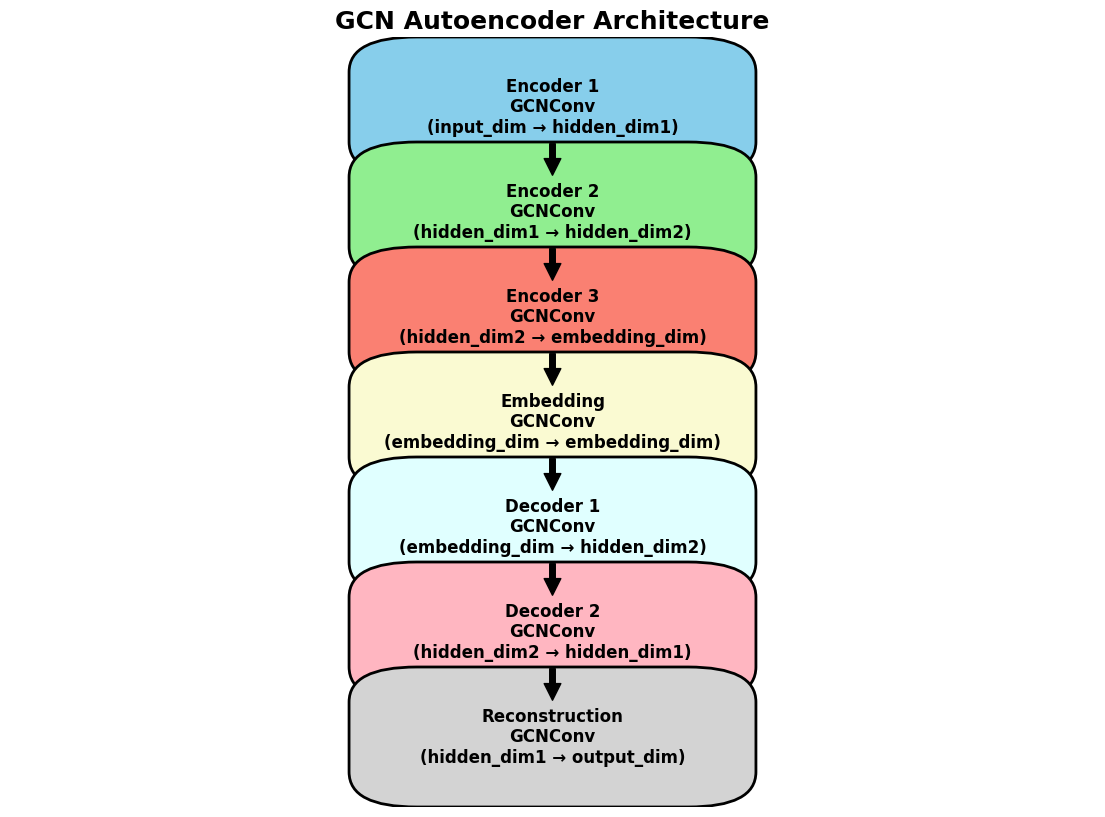

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_professional_gcn_ae_architecture():
    fig, ax = plt.subplots(figsize=(14, 10))

    # Define layer properties
    layer_props = {
        'encoder1': {'color': 'skyblue', 'label': 'Encoder 1\nGCNConv\n(input_dim → hidden_dim1)'},
        'encoder2': {'color': 'lightgreen', 'label': 'Encoder 2\nGCNConv\n(hidden_dim1 → hidden_dim2)'},
        'encoder3': {'color': 'salmon', 'label': 'Encoder 3\nGCNConv\n(hidden_dim2 → embedding_dim)'},
        'embedding': {'color': 'lightgoldenrodyellow', 'label': 'Embedding\nGCNConv\n(embedding_dim → embedding_dim)'},
        'decoder1': {'color': 'lightcyan', 'label': 'Decoder 1\nGCNConv\n(embedding_dim → hidden_dim2)'},
        'decoder2': {'color': 'lightpink', 'label': 'Decoder 2\nGCNConv\n(hidden_dim2 → hidden_dim1)'},
        'reconstruction': {'color': 'lightgrey', 'label': 'Reconstruction\nGCNConv\n(hidden_dim1 → output_dim)'}
    }

    # Define layer positions
    positions = {
        'encoder1': (0.4, 0.7),
        'encoder2': (0.4, 0.55),
        'encoder3': (0.4, 0.4),
        'embedding': (0.4, 0.25),
        'decoder1': (0.4, 0.1),
        'decoder2': (0.4, -0.05),
        'reconstruction': (0.4, -0.2)
    }

    # Draw layers
    for layer, props in layer_props.items():
        x, y = positions[layer]
        rect = patches.FancyBboxPatch((x - 0.1, y - 0.05), 0.2, 0.1, boxstyle="round,pad=0.05", edgecolor='black', facecolor=props['color'], linewidth=2)
        ax.add_patch(rect)
        ax.text(x, y, props['label'], ha='center', va='center', fontsize=12, fontweight='bold', color='black')

    # Draw arrows
    arrows = [
        ((0.4, 0.65), (0.4, 0.60)),
        ((0.4, 0.50), (0.4, 0.45)),
        ((0.4, 0.35), (0.4, 0.30)),
        ((0.4, 0.20), (0.4, 0.15)),
        ((0.4, 0.05), (0.4, 0.00)),
        ((0.4, -0.10), (0.4, -0.15))
    ]
    for start, end in arrows:
        ax.annotate('', xy=end, xytext=start, arrowprops=dict(facecolor='black', shrink=0.05))

    # Set plot limits and remove axes
    ax.set_xlim(0, 0.8)
    ax.set_ylim(-0.3, 0.8)
    ax.axis('off')

    plt.title('GCN Autoencoder Architecture', fontsize=18, fontweight='bold')
    plt.show()

# Draw the professional model architecture
draw_professional_gcn_ae_architecture()


# Courbe de Perte d’Entraînement et de Validation
Cette courbe montre l’évolution de la perte d’entraînement et de validation au cours des époques. Elle est utile pour évaluer la convergence du modèle et détecter tout problème de surapprentissage ou de sous-apprentissage.

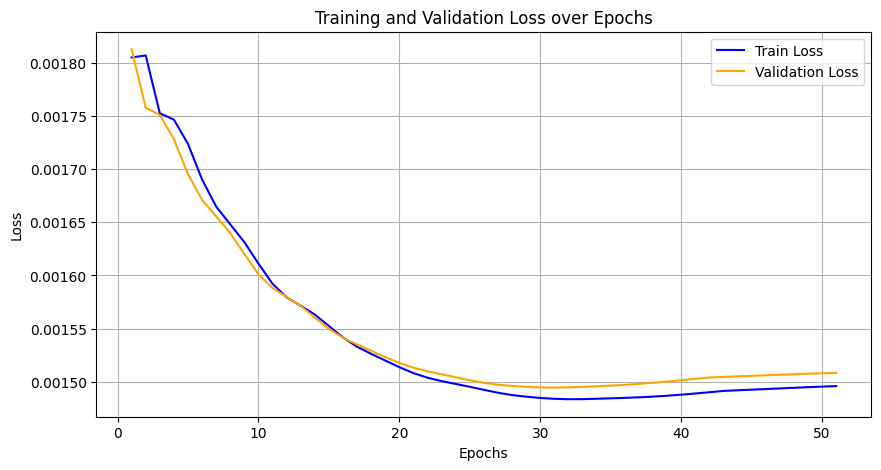

In [19]:
# Tracer les pertes d'entraînement et de validation avec courbes lissées
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, label='Train Loss', color='blue')
sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [20]:
checkpoint_path = '/content/checkpoints/checkpoint_epoch_50.pth'
checkpoint_path

'/content/checkpoints/checkpoint_epoch_50.pth'

In [21]:
import os
print(os.path.exists(checkpoint_path))


True


In [22]:
# Save embeddings to checkpoint file
checkpoint = {
    'embeddings': embeddings,
    # Add other relevant information if needed
}
torch.save(checkpoint, 'checkpoint.pth')

In [23]:
import torch

# Assuming `embeddings` is your data (e.g., a list or numpy array) to be converted to a tensor
embeddings = torch.tensor(embeddings)

checkpoint = {
    'embeddings': embeddings,
    # Add other relevant information if needed
}

# Save the checkpoint
torch.save(checkpoint, 'checkpoint.pth')

print("Checkpoint saved successfully.")


Checkpoint saved successfully.


In [24]:
checkpoint

{'embeddings': tensor([[ 2.7178e-04, -5.1318e-04, -1.8281e-04,  ..., -2.1087e-04,
          -6.6541e-04,  6.4593e-05],
         [ 2.7182e-04, -5.1310e-04, -1.8280e-04,  ..., -2.1094e-04,
          -6.6540e-04,  6.4677e-05],
         [ 2.7275e-04, -5.1076e-04, -1.8244e-04,  ..., -2.1323e-04,
          -6.6517e-04,  6.7297e-05],
         ...,
         [ 2.7197e-04, -5.1270e-04, -1.8274e-04,  ..., -2.1133e-04,
          -6.6536e-04,  6.5126e-05],
         [ 2.7241e-04, -5.1160e-04, -1.8257e-04,  ..., -2.1241e-04,
          -6.6525e-04,  6.6361e-05],
         [ 2.7223e-04, -5.1205e-04, -1.8264e-04,  ..., -2.1196e-04,
          -6.6530e-04,  6.5848e-05]])}

In [25]:
# Vérification des dimensions
print(f"Shape of embeddings: {embeddings.shape}")


Shape of embeddings: torch.Size([250, 16])


In [26]:

# Convertir le Tensor en une liste de listes (tableau) de valeurs
embeddings_list = embeddings.tolist()

# Créer un DataFrame pandas à partir de la liste de listes
columns = [f'Feature_{i+1}' for i in range(embeddings.shape[1])]  # Noms de colonnes génériques
embeddings_df = pd.DataFrame(embeddings_list, columns=columns)

# Afficher le DataFrame pour vérification
#print("DataFrame créé à partir de Tensor d'embeddings :")
embeddings_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16
0,0.000272,-0.000513,-0.000183,0.000129,0.000051,-0.000708,0.000118,0.000198,0.000579,-0.000377,0.000223,0.001243,0.000652,-0.000211,-0.000665,0.000065
1,0.000272,-0.000513,-0.000183,0.000129,0.000051,-0.000708,0.000118,0.000198,0.000579,-0.000377,0.000223,0.001243,0.000652,-0.000211,-0.000665,0.000065
2,0.000273,-0.000511,-0.000182,0.000128,0.000049,-0.000710,0.000117,0.000198,0.000585,-0.000375,0.000223,0.001237,0.000658,-0.000213,-0.000665,0.000067
3,0.000272,-0.000512,-0.000183,0.000128,0.000050,-0.000709,0.000118,0.000198,0.000582,-0.000376,0.000223,0.001240,0.000655,-0.000212,-0.000665,0.000066
4,0.000272,-0.000512,-0.000183,0.000128,0.000050,-0.000709,0.000118,0.000198,0.000581,-0.000377,0.000223,0.001240,0.000655,-0.000212,-0.000665,0.000066


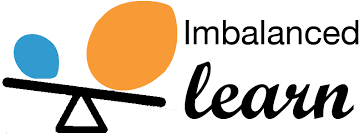

In [27]:
pip install imbalanced-learn

In [28]:
# Define y
Target= Mimic[['DRUG']]  # Target variable
label = Target

In [29]:
# Assuming y is your target variable
label_df = pd.DataFrame(label, columns=['DRUG'])  # Replace 'DRUG' with the appropriate column name if needed
label_df.shape
# Supprimer les lignes nulles
label_df = label_df.dropna().reset_index(drop=True)
# Join embeddings with label_df based on index
df = embeddings_df.join(label_df)

In [30]:
df.shape

(250, 17)

In [31]:
pip install catboost


# **Ensemble Learning, GridSearch Optimization, and Voting Classifier for Drug Classification**

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, jaccard_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données (assuming df contains your data)
data = df

# Séparer les caractéristiques et la cible
X = data.drop(columns=['DRUG'])  # embeddings
y = data['DRUG']

# Convertir les noms de médicaments en étiquettes catégorielles
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Mettre à l'échelle les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Rééchantillonner les données en utilisant RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y_encoded)

# Diviser les données rééchantillonnées en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define classifiers and their hyperparameter grids
classifiers = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [5, 10],
        'weights': ['uniform', 'distance']
    }),
    'Naive Bayes': (GaussianNB(), {}),  # No hyperparameters for Naive Bayes
    'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    })
}

# Function for hyperparameter tuning
def hyperparameter_tuning(clf, param_grid, X_train, y_train):
    if param_grid:  # Check if there are parameters to tune
        grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        return grid_search.best_estimator_
    else:
        return clf

# Function to print performance metrics
def print_performance(model_name, y_true, y_pred):
    print(f"\nPerformance for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Jaccard Index: {jaccard_score(y_true, y_pred, average='weighted'):.4f}")

# Tune classifiers
for name, (clf, param_grid) in classifiers.items():
    print(f"Tuning hyperparameters for {name}...")
    best_clf = hyperparameter_tuning(clf, param_grid, X_train, y_train)
    classifiers[name] = best_clf

# Evaluate classifiers
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Jaccard Index': jaccard_score(y_test, y_pred, average='weighted')
    })
    print_performance(name, y_test, y_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("Classificateurs triés par Accuracy après hyperparameter tuning:")
print(sorted_results_df)

# Best classifier after hyperparameter tuning
best_model_info = sorted_results_df.iloc[0]
best_classifier_name = best_model_info['Model']
best_accuracy = best_model_info['Accuracy']
best_precision = best_model_info['Precision']
best_recall = best_model_info['Recall']
best_f1 = best_model_info['F1 Score']
best_jaccard = best_model_info['Jaccard Index']

print(f'\nBest Classifier: {best_classifier_name}')
print(f'Accuracy: {best_accuracy:.4f}')
print(f'Precision: {best_precision:.4f}')
print(f'Recall: {best_recall:.4f}')
print(f'F1 Score: {best_f1:.4f}')
print(f'Jaccard Index: {best_jaccard:.4f}')

# Use VotingClassifier to combine predictions
voting_clf = VotingClassifier(estimators=[
    ('rf', classifiers['Random Forest']),
    ('gb', classifiers['Gradient Boosting']),
    ('knn', classifiers['K-Nearest Neighbors']),
    ('nb', classifiers['Naive Bayes']),
    ('xgboost', classifiers['XGBoost'])
], voting='soft')  # 'soft' uses predicted probabilities for majority rule voting

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print_performance('Voting Classifier', y_test, y_pred_voting)



Tuning hyperparameters for Random Forest...
Tuning hyperparameters for Gradient Boosting...
Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Naive Bayes...
Tuning hyperparameters for XGBoost...

Performance for Random Forest:
Accuracy: 0.9807
Precision: 0.9733
Recall: 0.9807
F1 Score: 0.9751
Jaccard Index: 0.9660

Performance for Gradient Boosting:
Accuracy: 0.9807
Precision: 0.9727
Recall: 0.9807
F1 Score: 0.9751
Jaccard Index: 0.9664

Performance for K-Nearest Neighbors:
Accuracy: 0.9807
Precision: 0.9735
Recall: 0.9807
F1 Score: 0.9751
Jaccard Index: 0.9662

Performance for Naive Bayes:
Accuracy: 0.7084
Precision: 0.6798
Recall: 0.7084
F1 Score: 0.6873
Jaccard Index: 0.6790

Performance for XGBoost:
Accuracy: 0.9783
Precision: 0.9733
Recall: 0.9783
F1 Score: 0.9734
Jaccard Index: 0.9636
Classificateurs triés par Accuracy après hyperparameter tuning:
                 Model  Accuracy  Precision    Recall  F1 Score  Jaccard Index
0        Random Forest  0.98

In [35]:
print(f'Voting Classifier Performance:')
results_df

Voting Classifier Performance:


,Model,Accuracy,Precision,Recall,F1 Score,Jaccard Index
0,Random Forest,0.980723,0.973273,0.980723,0.975075,0.966044
1,Gradient Boosting,0.980723,0.972671,0.980723,0.975075,0.966406
2,K-Nearest Neighbors,0.980723,0.973474,0.980723,0.975144,0.966245
3,Naive Bayes,0.708434,0.679752,0.708434,0.687325,0.679024
4,XGBoost,0.978313,0.973276,0.978313,0.973357,0.963637


### **Plotting Accuracy, Precision, Recall, and F1 Score**

---





Precision-Recall Curve: Shows the trade-off between precision and recall for different thresholds.
Learning Curves: Displays how training and validation scores evolve with more training data.
Feature Importance: Indicates which features have the most influence on the model’s predictions.

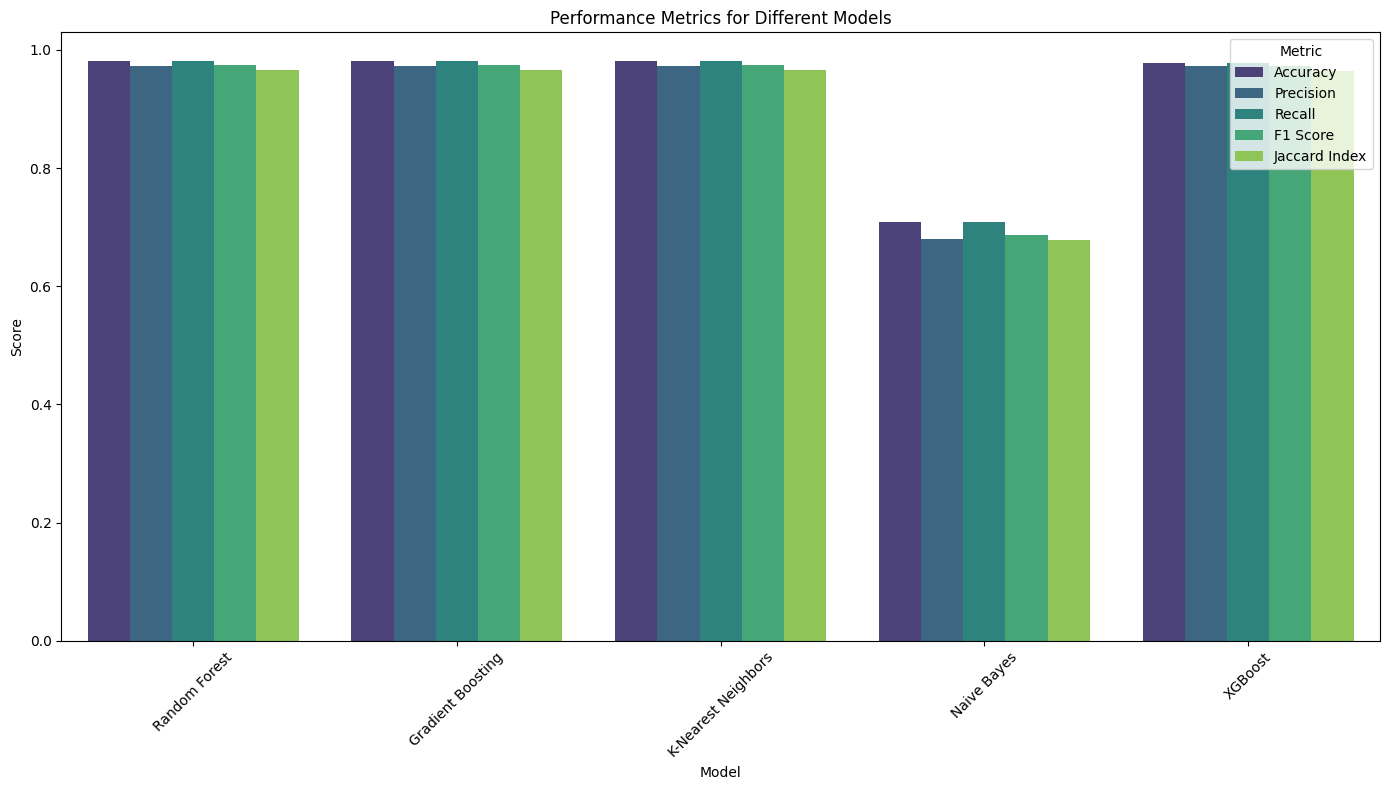

In [37]:
results_df = pd.DataFrame(results)

# Melt the DataFrame for easy plotting
metrics_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(14, 8))

# Bar plot for each metric
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df, palette='viridis')
plt.title('Performance Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

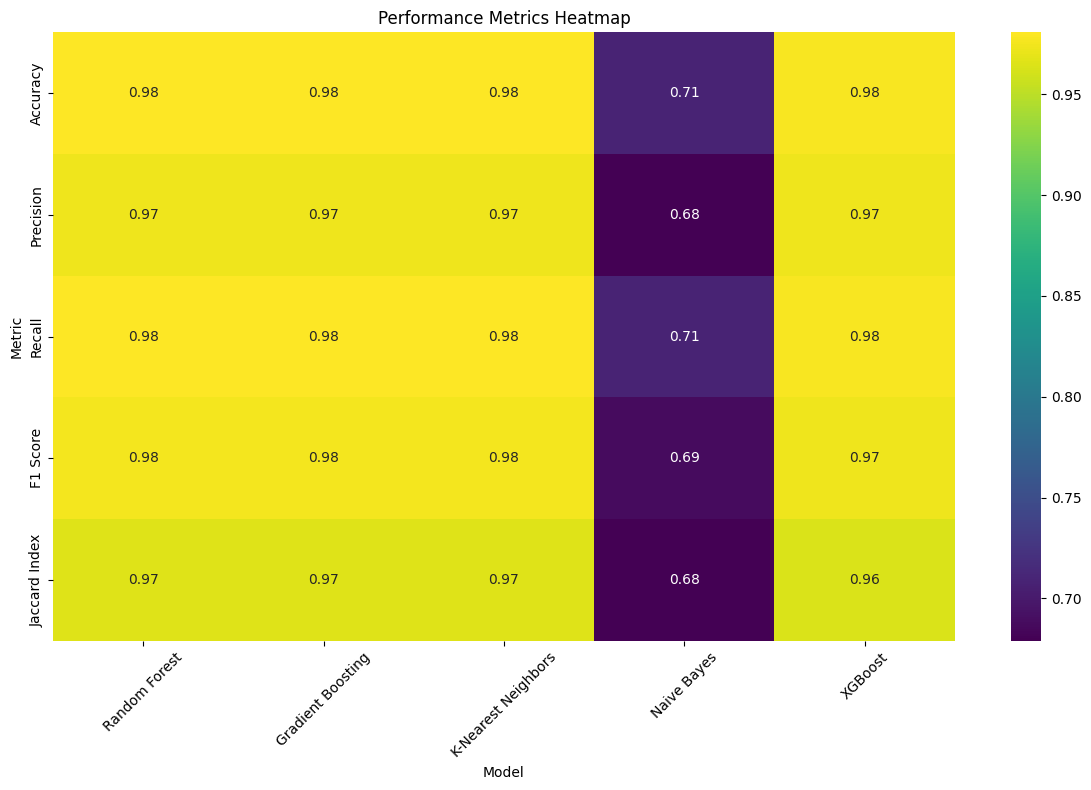

In [36]:


results_df = pd.DataFrame(results)

# Pivot the DataFrame for heatmap
heatmap_data = results_df.set_index('Model').T

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f', cbar=True)
plt.title('Performance Metrics Heatmap')
plt.xlabel('Model')
plt.ylabel('Metric')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()